In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns', 30)

run_o3a_raw = pd.read_csv('../data/gspy_o3a.csv')

#Sorting GPSTime From Lowest To Highest
run_o3a_sorted = run_o3a_raw.sort_values('GPStime', ascending = True)

#Creating The Boolean Confidence Filter
high_confidence = run_o3a_sorted['confidence'] >= .95
run_o3a_sorted = run_o3a_sorted[high_confidence].reset_index()

run_o3a_sorted['label'].value_counts()

Scattered_Light        28313
Low_Frequency_Burst    15899
Extremely_Loud         15631
Tomte                  13815
No_Glitch              13572
Koi_Fish               11317
Blip                   11013
None_of_the_Above       8796
Whistle                 7068
Low_Frequency_Lines     2762
1400Ripples             1842
Power_Line              1579
Air_Compressor           963
Repeating_Blips          785
Scratchy                 344
Violin_Mode              232
Light_Modulation          99
Helix                     54
Paired_Doves              45
Wandering_Line            20
Chirp                     13
1080Lines                  8
Name: label, dtype: int64

### Scattering Light

In [5]:
doublerows = run_o3a_sorted.append(run_o3a_sorted).reset_index()

#Creating A 1 Column Dataframe From DoubleRuns
t1 = doublerows
t1 = doublerows['GPStime']
#Changing The GPS Times To Intervals Of 60 Seconds --> Will Have To Cut Bottom Rows Later On
previous_value = 0
t1[0] = 0

for k in range(1, len(t1)):
    t1[k] = previous_value + 60
    previous_value = previous_value + 60
#Converting To A Dataframe
t1 = t1.to_frame()

In [6]:
#Creating A 2nd Column For Glitch Count
t1["Glitch Count"] = t1["GPStime"]

In [7]:
filt = run_o3a_sorted['label'] == 'Scattered_Light'
scattering = run_o3a_sorted[filt].reset_index()

In [21]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = scattering['GPStime'].between(start_index, end_index)
    t1.iloc[k,1] = len(scattering[filter])
    start_index = end_index + 1

In [28]:
t1 = t1.iloc[0:263480]
t1 = t1.rename(columns = {"GPStime":"Time In Seconds"})
t1['Glitch Count'].sum()

2082643407600

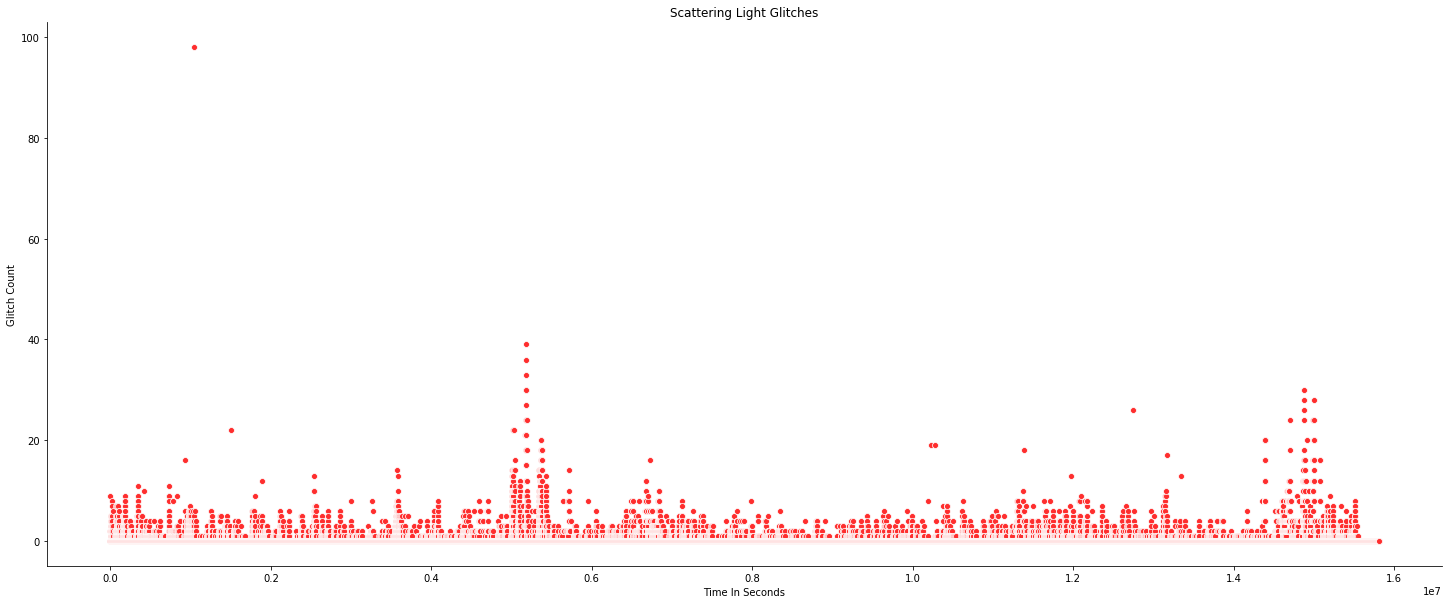

In [23]:
plt.figure(figsize=(25, 10))
color = ['#FE2E2E']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t1)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Scattering Light Glitches')
plt.show()

### Low Frequency Burst

In [8]:
t2 = doublerows
t2 = doublerows['GPStime'].to_frame()
t2["Glitch Count"] = t2["GPStime"]

In [9]:
filt = run_o3a_sorted['label'] == 'Low_Frequency_Burst'
lfb = run_o3a_sorted[filt].reset_index()

In [10]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = lfb['GPStime'].between(start_index, end_index)
    t2.iloc[k,1] = len(lfb[filter])
    start_index = end_index + 1

In [18]:
t2 = t2.iloc[0:263480]
t2 = t2.rename(columns = {"GPStime":"Time In Seconds"})
t2['Glitch Count'].sum()

15899

In [25]:
gc = t2['Glitch Count'].replace(0, np.nan).to_frame()
t2 = t2[['Time In Seconds']]
t2['Glitch Count'] = gc

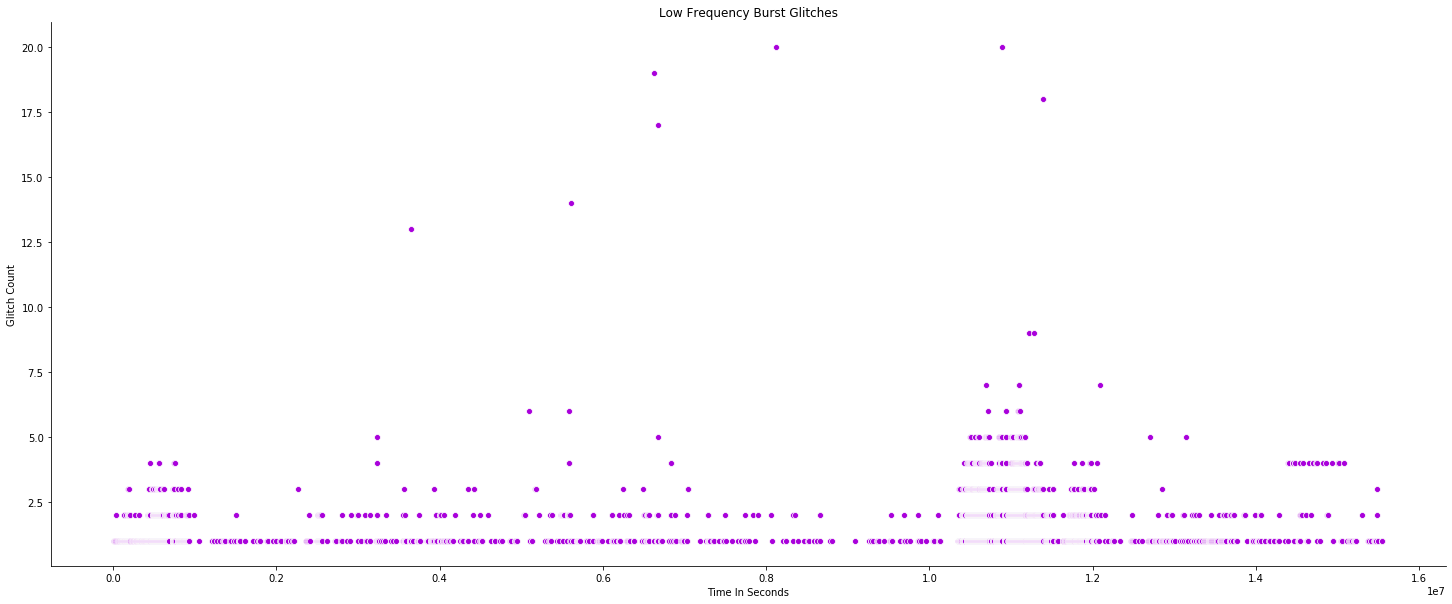

In [36]:
plt.figure(figsize=(25, 10))
color = ['#A901DB']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t2)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Low Frequency Burst Glitches')
plt.show()

### Extremely Loud

In [29]:
t3 = doublerows
t3 = doublerows['GPStime'].to_frame()
t3["Glitch Count"] = t3["GPStime"]

In [33]:
filt = run_o3a_sorted['label'] == 'Extremely_Loud'
el = run_o3a_sorted[filt].reset_index()

In [34]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = el['GPStime'].between(start_index, end_index)
    t3.iloc[k,1] = len(el[filter])
    start_index = end_index + 1

In [39]:
t3 = t3.iloc[0:263480]
t3 = t3.rename(columns = {"GPStime":"Time In Seconds"})
t3['Glitch Count'].sum()

15631

In [46]:
gc = t3['Glitch Count'].replace(0, np.nan).to_frame()
t3 = t3[['Time In Seconds']]
t3['Glitch Count'] = gc

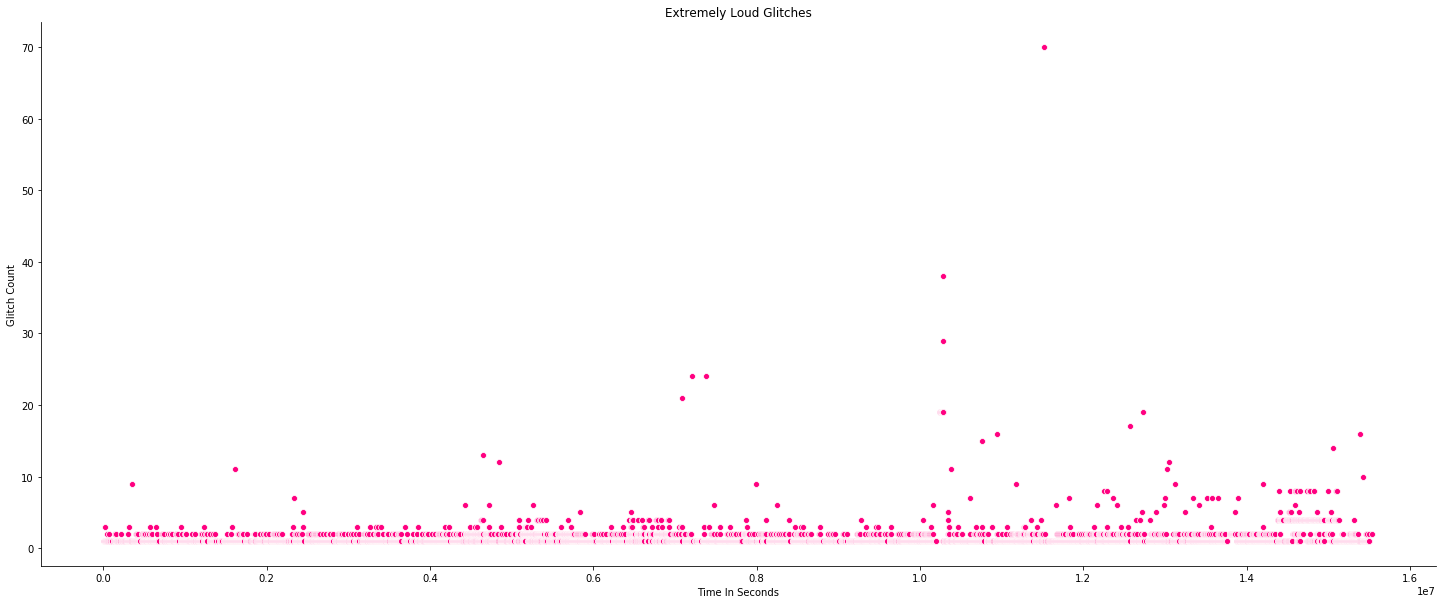

In [47]:
plt.figure(figsize=(25, 10))
color = ['#FF0080']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t3)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Extremely Loud Glitches')
plt.show()

### Tomte

In [48]:
t4 = doublerows
t4 = doublerows['GPStime'].to_frame()
t4["Glitch Count"] = t4["GPStime"]

In [49]:
filt = run_o3a_sorted['label'] == 'Tomte'
tom = run_o3a_sorted[filt].reset_index()

In [51]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = tom['GPStime'].between(start_index, end_index)
    t4.iloc[k,1] = len(tom[filter])
    start_index = end_index + 1

In [53]:
t4 = t4.iloc[0:263480]
t4 = t4.rename(columns = {"GPStime":"Time In Seconds"})
t4['Glitch Count'].sum()

13815

In [54]:
gc = t4['Glitch Count'].replace(0, np.nan).to_frame()
t4 = t4[['Time In Seconds']]
t4['Glitch Count'] = gc

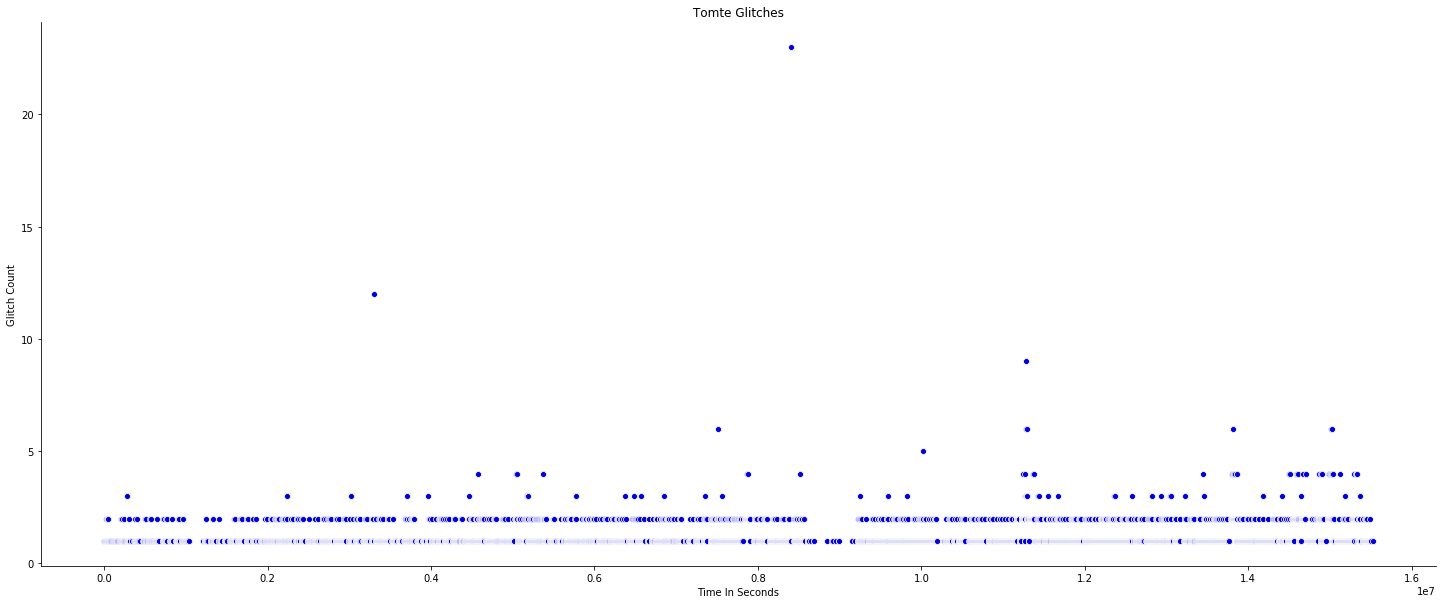

In [72]:
plt.figure(figsize=(25, 10))
color = ['#0101DF']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t4)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Tomte Glitches')
plt.show()

### No Glitch

In [57]:
t5 = doublerows
t5 = doublerows['GPStime'].to_frame()
t5["Glitch Count"] = t5["GPStime"]

In [62]:
filt = run_o3a_sorted['label'] == 'No_Glitch'
ng = run_o3a_sorted[filt].reset_index()

In [63]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = ng['GPStime'].between(start_index, end_index)
    t5.iloc[k,1] = len(ng[filter])
    start_index = end_index + 1

In [65]:
t5 = t5.iloc[0:263480]
t5 = t5.rename(columns = {"GPStime":"Time In Seconds"})
t5['Glitch Count'].sum()

13572

In [66]:
gc = t5['Glitch Count'].replace(0, np.nan).to_frame()
t5 = t5[['Time In Seconds']]
t5['Glitch Count'] = gc

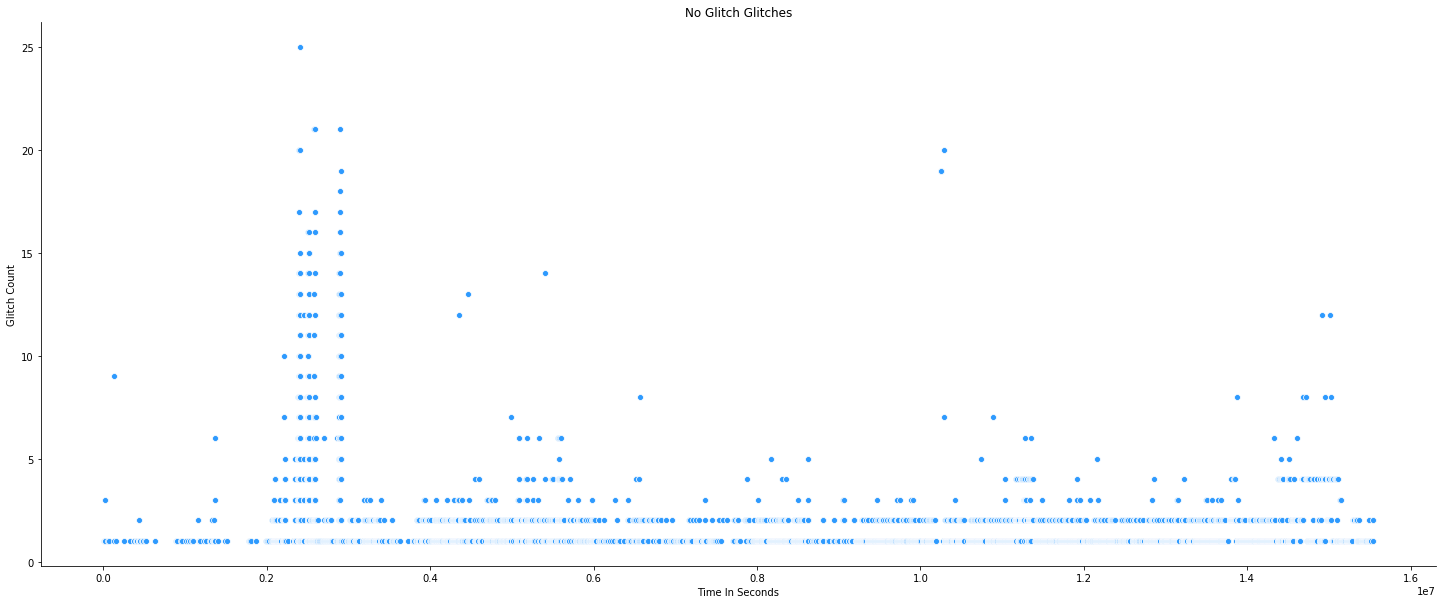

In [74]:
plt.figure(figsize=(25, 10))
color = ['#2E9AFE']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t5)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('No Glitch Glitches')
plt.show()

In [75]:
t6 = doublerows
t6 = doublerows['GPStime'].to_frame()
t6["Glitch Count"] = t6["GPStime"]

In [77]:
filt = run_o3a_sorted['label'] == 'Koi_Fish'
kf = run_o3a_sorted[filt].reset_index()

In [79]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = kf['GPStime'].between(start_index, end_index)
    t6.iloc[k,1] = len(kf[filter])
    start_index = end_index + 1

In [80]:
t6 = t6.iloc[0:263480]
t6 = t6.rename(columns = {"GPStime":"Time In Seconds"})
t6['Glitch Count'].sum()

11317

In [82]:
gc = t6['Glitch Count'].replace(0, np.nan).to_frame()
t6 = t6[['Time In Seconds']]
t6['Glitch Count'] = gc

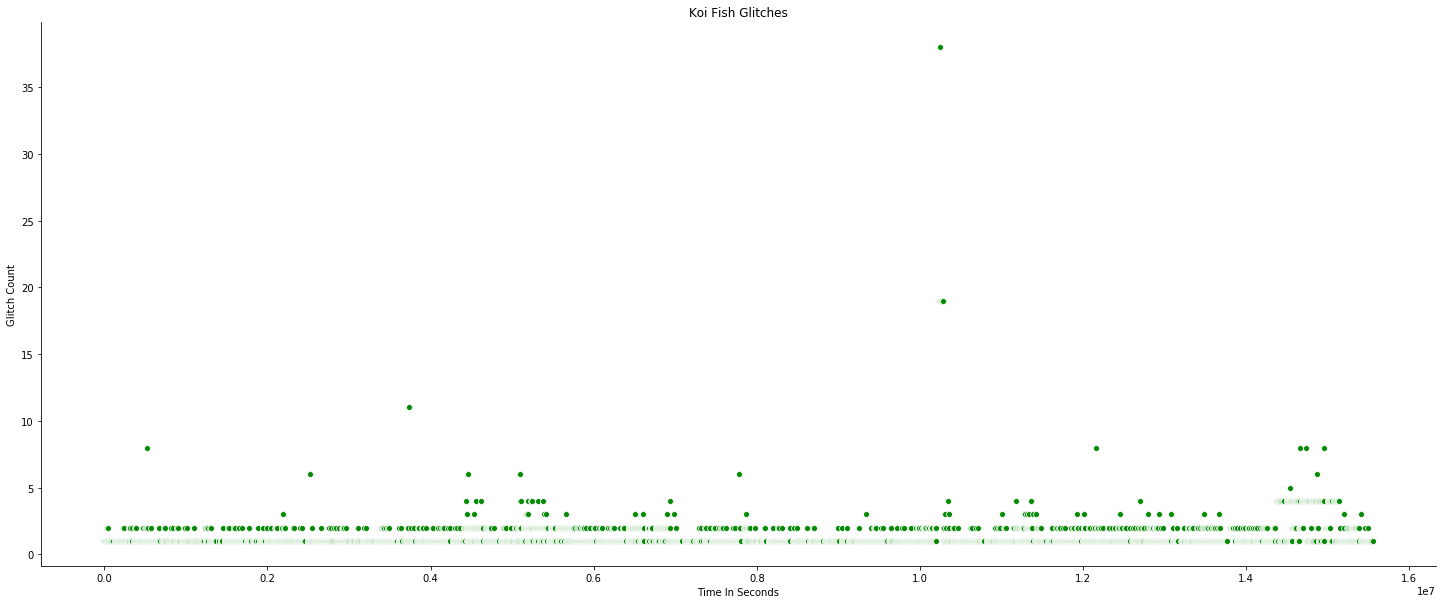

In [83]:
plt.figure(figsize=(25, 10))
color = ['#088A08']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t6)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Koi Fish Glitches')
plt.show()

### Blip

In [84]:
t7 = doublerows
t7 = doublerows['GPStime'].to_frame()
t7["Glitch Count"] = t7["GPStime"]

In [87]:
filt = run_o3a_sorted['label'] == 'Blip'
bp = run_o3a_sorted[filt].reset_index()

In [88]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = bp['GPStime'].between(start_index, end_index)
    t7.iloc[k,1] = len(bp[filter])
    start_index = end_index + 1

In [89]:
t7 = t7.iloc[0:263480]
t7 = t7.rename(columns = {"GPStime":"Time In Seconds"})
t7['Glitch Count'].sum()

11013

In [90]:
gc = t7['Glitch Count'].replace(0, np.nan).to_frame()
t7 = t7[['Time In Seconds']]
t7['Glitch Count'] = gc

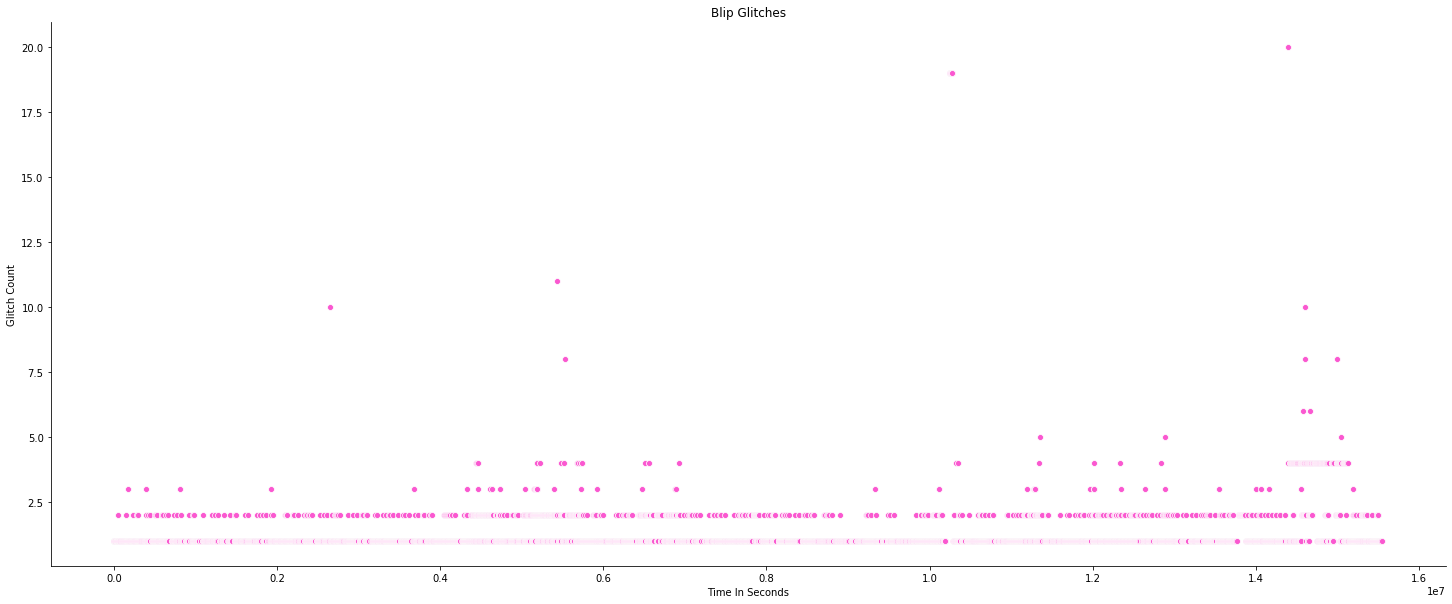

In [91]:
plt.figure(figsize=(25, 10))
color = ['#FA58D0']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t7)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Blip Glitches')
plt.show()

### None of the Above

In [92]:
t8 = doublerows
t8 = doublerows['GPStime'].to_frame()
t8["Glitch Count"] = t8["GPStime"]

In [93]:
filt = run_o3a_sorted['label'] == 'None_of_the_Above'
none = run_o3a_sorted[filt].reset_index()

In [95]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = none['GPStime'].between(start_index, end_index)
    t8.iloc[k,1] = len(none[filter])
    start_index = end_index + 1

In [96]:
t8 = t8.iloc[0:263480]
t8 = t8.rename(columns = {"GPStime":"Time In Seconds"})
t8['Glitch Count'].sum()

8796

In [97]:
gc = t8['Glitch Count'].replace(0, np.nan).to_frame()
t8 = t8[['Time In Seconds']]
t8['Glitch Count'] = gc

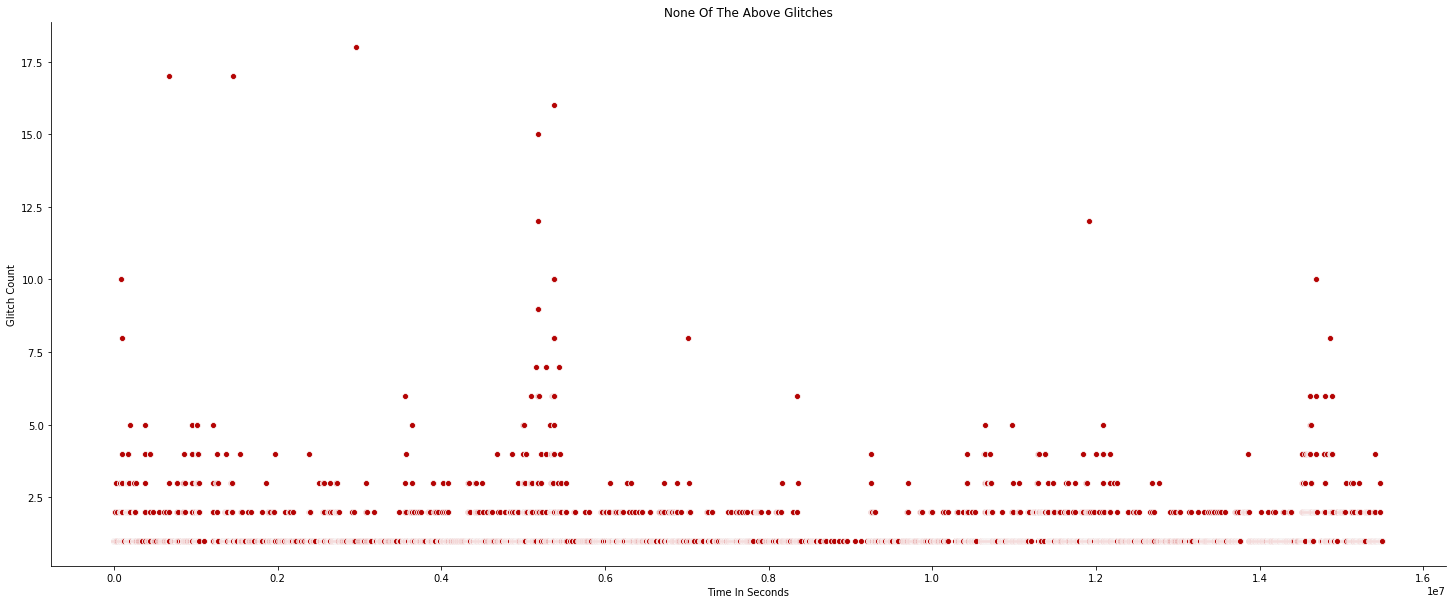

In [98]:
plt.figure(figsize=(25, 10))
color = ['#B40404']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t8)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('None Of The Above Glitches')
plt.show()

### Whistle

In [99]:
t9 = doublerows
t9 = doublerows['GPStime'].to_frame()
t9["Glitch Count"] = t9["GPStime"]

In [100]:
filt = run_o3a_sorted['label'] == 'Whistle'
wh = run_o3a_sorted[filt].reset_index()

In [101]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = wh['GPStime'].between(start_index, end_index)
    t9.iloc[k,1] = len(wh[filter])
    start_index = end_index + 1

In [102]:
t9 = t9.iloc[0:263480]
t9 = t9.rename(columns = {"GPStime":"Time In Seconds"})
t9['Glitch Count'].sum()

7068

In [103]:
gc = t9['Glitch Count'].replace(0, np.nan).to_frame()
t9 = t9[['Time In Seconds']]
t9['Glitch Count'] = gc

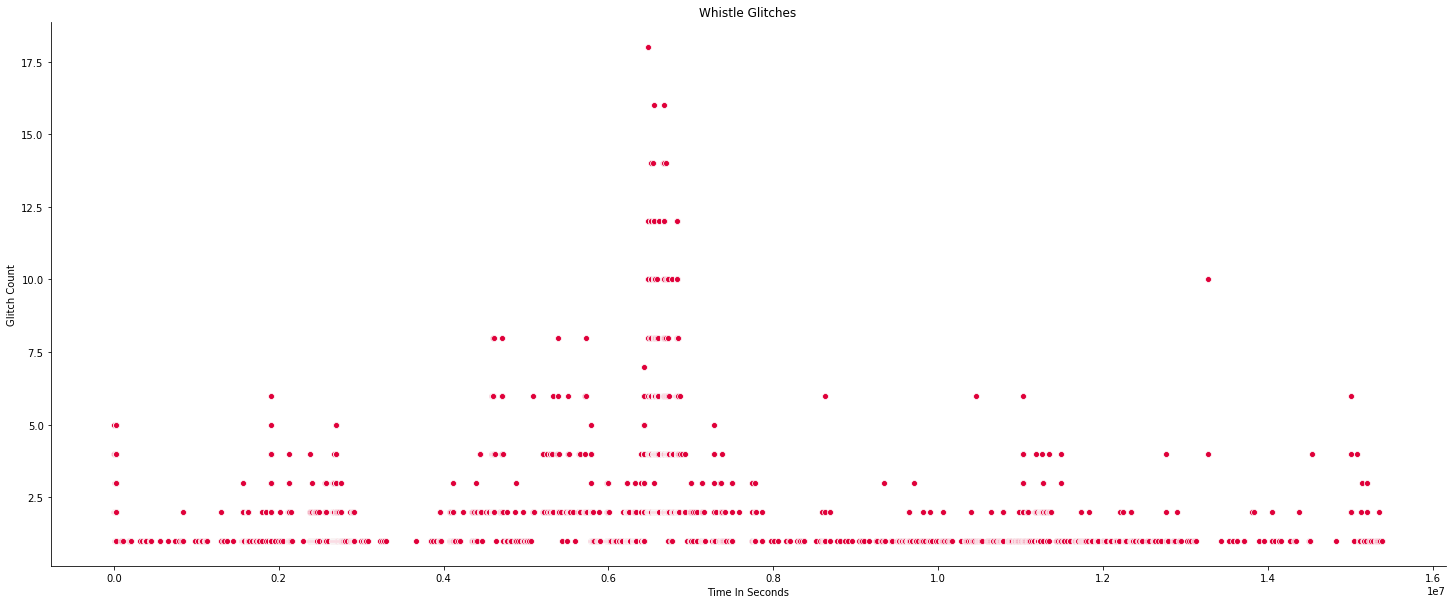

In [104]:
plt.figure(figsize=(25, 10))
color = ['#DF013A']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t9)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Whistle Glitches')
plt.show()

### Low Frequency Lines

In [105]:
t10 = doublerows
t10 = doublerows['GPStime'].to_frame()
t10["Glitch Count"] = t10["GPStime"]

In [106]:
filt = run_o3a_sorted['label'] == 'Low_Frequency_Lines'
lfl = run_o3a_sorted[filt].reset_index()

In [107]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = lfl['GPStime'].between(start_index, end_index)
    t10.iloc[k,1] = len(lfl[filter])
    start_index = end_index + 1

In [108]:
t10 = t10.iloc[0:263480]
t10 = t10.rename(columns = {"GPStime":"Time In Seconds"})
t10['Glitch Count'].sum()

2762

In [109]:
gc = t10['Glitch Count'].replace(0, np.nan).to_frame()
t10 = t10[['Time In Seconds']]
t10['Glitch Count'] = gc

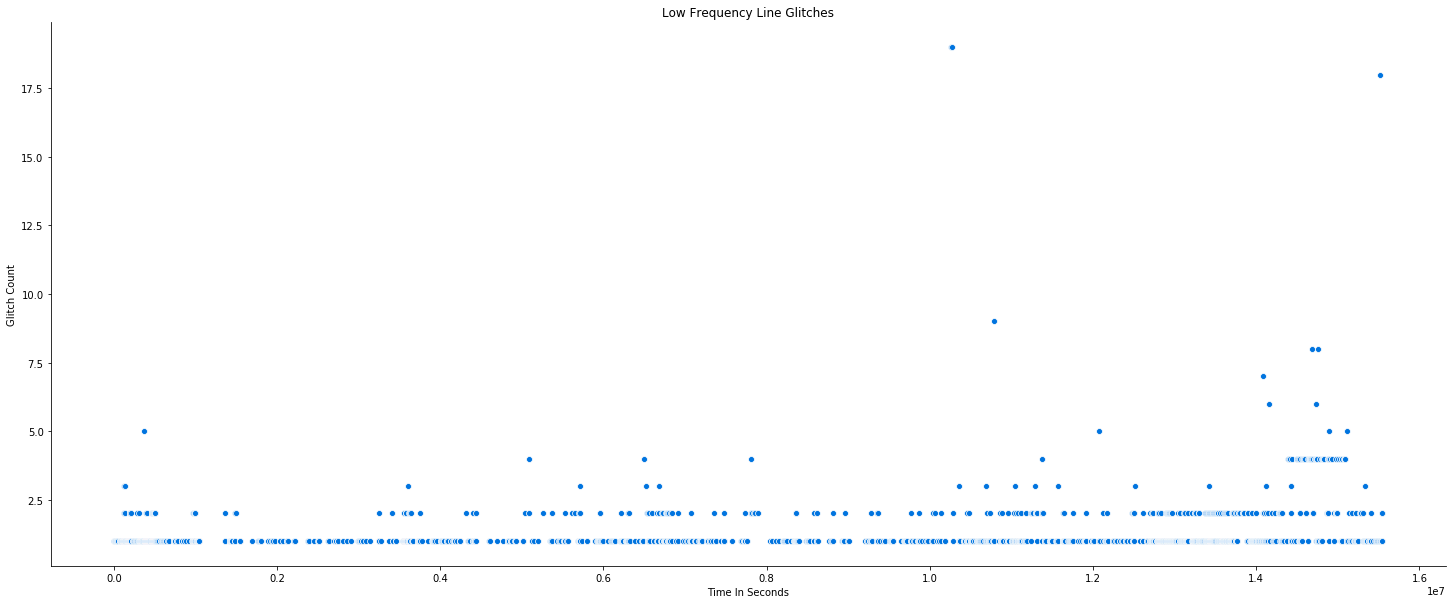

In [110]:
plt.figure(figsize=(25, 10))
color = ['#0174DF']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t10)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Low Frequency Line Glitches')
plt.show()

### 1400Ripples

In [111]:
t11 = doublerows
t11 = doublerows['GPStime'].to_frame()
t11["Glitch Count"] = t11["GPStime"]

In [112]:
filt = run_o3a_sorted['label'] == '1400Ripples'
rip = run_o3a_sorted[filt].reset_index()

In [113]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = rip['GPStime'].between(start_index, end_index)
    t11.iloc[k,1] = len(rip[filter])
    start_index = end_index + 1

In [114]:
t11 = t11.iloc[0:263480]
t11 = t11.rename(columns = {"GPStime":"Time In Seconds"})
t11['Glitch Count'].sum()

1842

In [115]:
gc = t11['Glitch Count'].replace(0, np.nan).to_frame()
t11 = t11[['Time In Seconds']]
t11['Glitch Count'] = gc

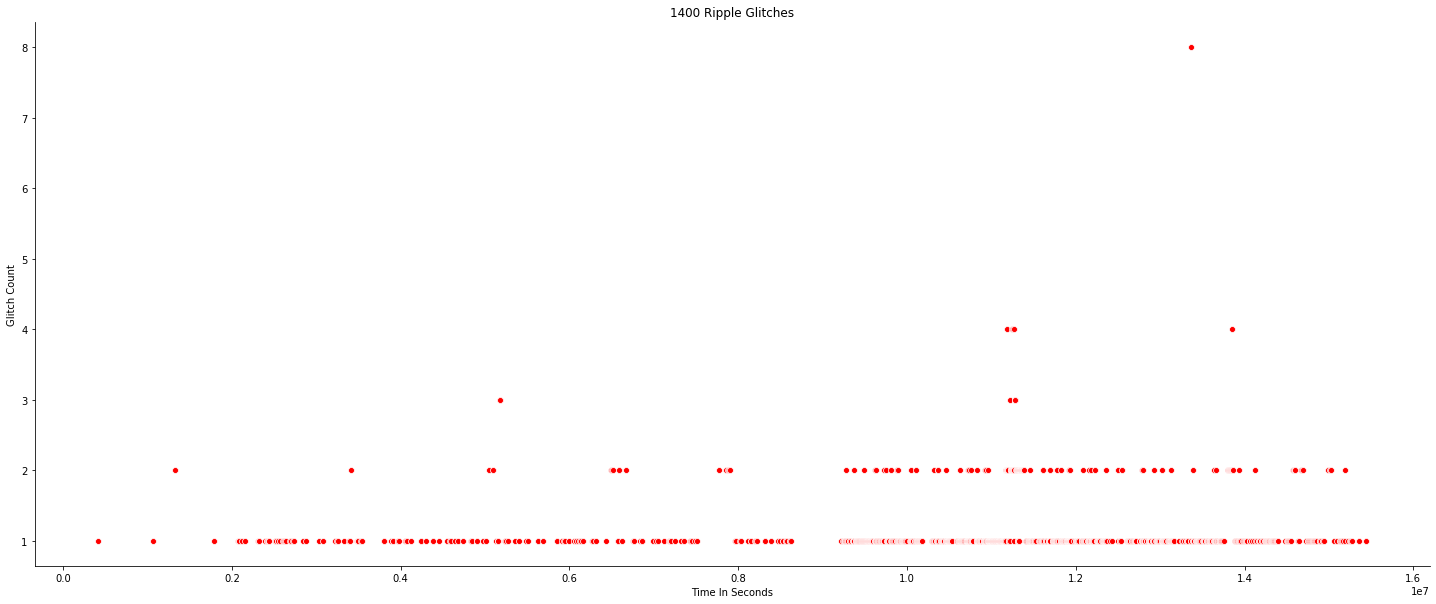

In [116]:
plt.figure(figsize=(25, 10))
color = ['#FF0000']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t11)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('1400 Ripple Glitches')
plt.show()

### Power Line

In [117]:
t12 = doublerows
t12 = doublerows['GPStime'].to_frame()
t12["Glitch Count"] = t12["GPStime"]

In [118]:
filt = run_o3a_sorted['label'] == 'Power_Line'
pl = run_o3a_sorted[filt].reset_index()

In [119]:
end_index = 0
start_index = 1238166093

for k in range(1,263480):
    end_index = start_index + 60  
    filter = pl['GPStime'].between(start_index, end_index)
    t12.iloc[k,1] = len(pl[filter])
    start_index = end_index + 1

In [120]:
t12 = t12.iloc[0:263480]
t12 = t12.rename(columns = {"GPStime":"Time In Seconds"})
t12['Glitch Count'].sum()

1579

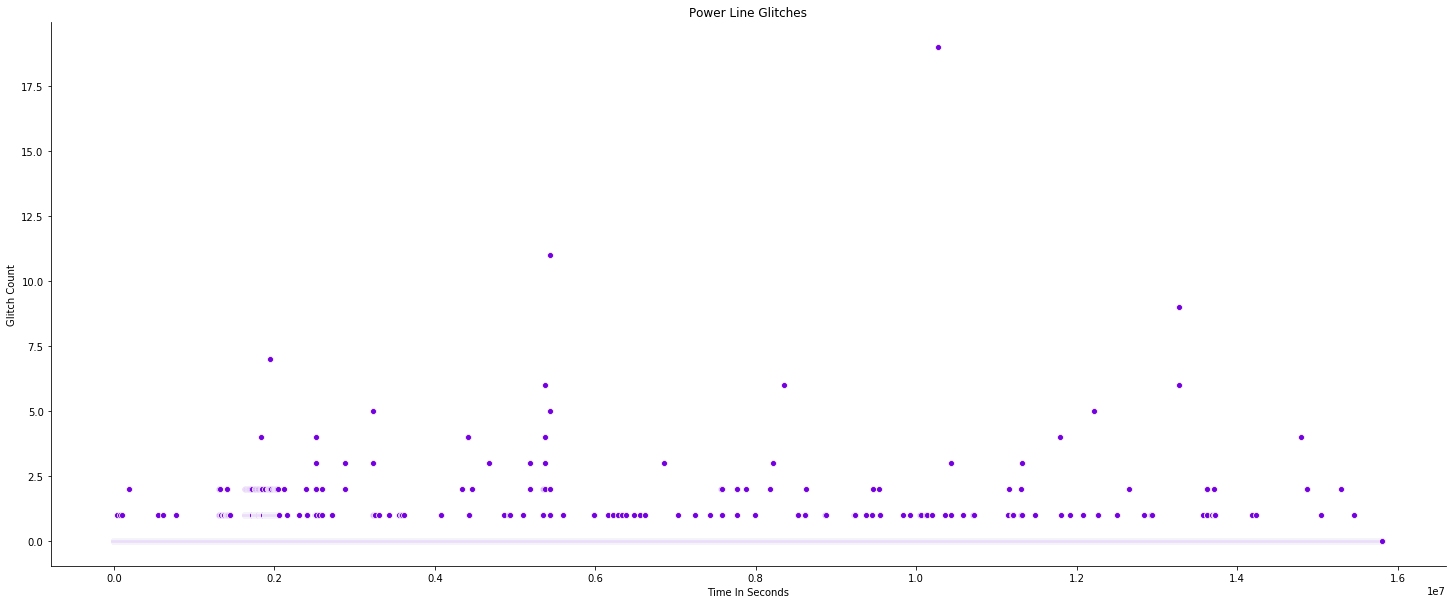

In [122]:
plt.figure(figsize=(25, 10))
color = ['#7401DF']
sns.set_palette(sns.color_palette(color))

plot = sns.scatterplot(x = 'Time In Seconds', y = 'Glitch Count', data = t12)
plot.spines['top'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.set_title('Power Line Glitches')
plt.show()